<a href="https://colab.research.google.com/github/solharsh/Capstone_Sentiment_Analysis/blob/master/Word_Embeddings_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Word Embeddings with New Deep Learning Models

Traditional (count-based) feature engineering strategies for textual data involve models belonging to a family of models popularly known as the Bag of Words model. This includes term frequencies, TF-IDF (term frequency-inverse document frequency), N-grams and so on. While they are effective methods for extracting features from text, due to the inherent nature of the model being just a bag of unstructured words, we lose additional information like the semantics, structure, sequence and context around nearby words in each text document.

This forms as enough motivation for us to explore more sophisticated models which can capture this information and give us features which are vector representation of words, popularly known as embeddings.

Here I will explore the following feature engineering techniques:

- Word2Vec
- GloVe
- FastText

Predictive methods like Neural Network based language models try to predict words from its neighboring words looking at word sequences in the corpus and in the process it learns distributed representations giving us dense word embeddings. We will be focusing on these predictive methods in this article.



In [0]:
import pickle
import pandas as pd
DATA_PATH = "/content/drive/My Drive/Capstone Project - NLP/Harsh/Project_Checkpoints/"
infile = open(DATA_PATH+'/speech_cleaned_checkpoint.pkl','rb')
df = pickle.load(infile)

In [0]:
df.head(1)

,Speaker_Name,Date_Of_Speech,Speech,Speech_Cleaned,word_count,negation,length,has_url,quest_mark,excl_mark
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...,budget speech pranab mukherjee minister financ...,14077,True,89122,True,0,0


In [0]:
df = df.drop(['word_count','negation','length','has_url','quest_mark','excl_mark'],axis=1)

In [0]:
df.head(1)

,Speaker_Name,Date_Of_Speech,Speech,Speech_Cleaned
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...,budget speech pranab mukherjee minister financ...


In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# The Word2Vec Model

This model was created by Google in 2013 and is a predictive deep learning based model to compute and generate high quality, distributed and continuous dense vector representations of words, which capture contextual and semantic similarity. Essentially these are unsupervised models which can take in massive textual corpora, create a vocabulary of possible words and generate dense word embeddings for each word in the vector space representing that vocabulary.

Usually you can specify the size of the word embedding vectors and the total number of vectors are essentially the size of the vocabulary. This makes the dimensionality of this dense vector space much lower than the high-dimensional sparse vector space built using traditional Bag of Words models.

There are two different model architectures which can be leveraged by Word2Vec to create these word embedding representations. These include,

- The Continuous Bag of Words (CBOW) Model
- The Skip-gram Model

## The Continuous Bag of Words (CBOW) Model

The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).

Considering a simple sentence, “the quick brown fox jumps over the lazy dog”, this can be pairs of (context_window, target_word) where if we consider a context window of size 2, we have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on.

Thus the model tries to predict the target_word based on the context_window words.



## The Skip-gram Model

The Skip-gram model architecture usually tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the center word).

Considering our simple sentence from earlier, “the quick brown fox jumps over the lazy dog”. If we used the CBOW model, we get pairs of (context_window, target_word) where if we consider a context window of size 2, we have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on.

Now considering that the skip-gram model’s aim is to predict the context from the target word, the model typically inverts the contexts and targets, and tries to predict each context word from its target word. Hence the task becomes to predict the context [quick, fox] given target word ‘brown’ or [the, brown] given target word ‘quick’ and so on.

Thus the model tries to predict the context_window words based on the target_word.



# Robust Word2Vec Model with Gensim

The gensim framework, created by Radim Řehůřek consists of a robust, efficient and scalable implementation of the Word2Vec model. I will leverage the same on our financial speech corpus.

In our workflow, we will tokenize our normalized corpus and then focus on the following four parameters in the Word2Vec model to build it.

```
size: The word embedding dimensionality
window: The context window size
min_count: The minimum word count
sample: The downsample setting for frequent words
sg: Training model, 1 for skip-gram otherwise CBOW
```
We will build a simple Word2Vec model on the corpus and visualize the embeddings.



In [0]:
from gensim.models import word2vec

In [0]:
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in df.Speech_Cleaned]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 10   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter=5000)
w2v_model

In [0]:
w2v_model.save("/content/drive/My Drive/Capstone Project - NLP/Harsh/Project_Checkpoints/word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


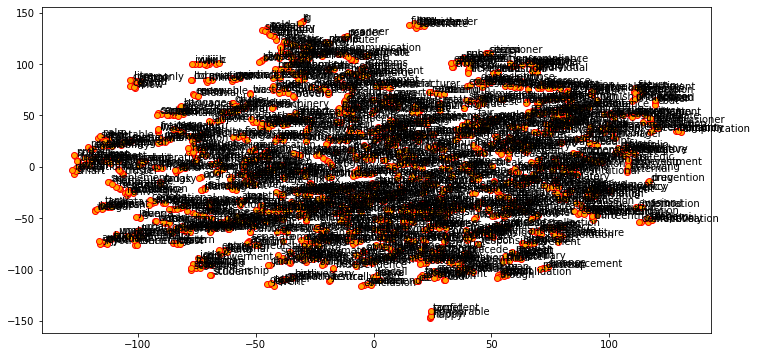

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=101, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [0]:
w2v_model.wv['scholarship'], w2v_model.wv['scholarship'].shape

(array([ 0.04601171, -1.2019454 ,  0.57237124,  0.46479696, -0.5649906 ,
         1.1682055 ,  1.6393812 ,  0.3463842 , -0.8178272 ,  0.8217777 ,
        -0.23370934,  1.0540502 ,  0.21228866, -1.608777  , -0.05518347],
       dtype=float32), (15,))

In [0]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

In [0]:
model = Word2Vec.load("/content/drive/My Drive/Capstone Project - NLP/Harsh/Project_Checkpoints/word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
propose,-0.215698,-0.351570,0.068812,0.335956,-0.233868,0.147946,1.099773,0.128620,0.164403,-0.136057,0.226426,-0.043629,-0.231494,-0.076584,0.025465
tax,0.097544,-0.411581,0.093819,0.538810,-0.428017,0.627617,0.949500,0.367529,-0.146866,0.138842,0.761894,-0.601221,-0.181640,0.427267,-0.159266
crore,-0.435912,-0.053515,0.789413,0.607919,-0.338270,-0.026884,1.008859,0.495702,-0.392401,-0.121995,-0.069082,0.384315,0.198081,-0.393619,0.031490
year,-0.109665,0.056451,0.496037,0.681462,-0.283809,0.262404,0.950605,0.061401,-0.238397,-0.089901,-0.015755,0.124723,0.375951,0.244208,-0.275612
government,-0.401781,0.040097,0.389976,0.187939,-0.183350,0.428097,0.749590,0.263483,-0.405758,0.056878,-0.202993,0.079011,0.078889,0.338715,-0.003284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
statutory,-0.039447,-0.215556,-0.019774,-0.092246,-0.428574,0.999354,1.342731,0.235561,0.140926,0.340613,-0.177660,-0.184741,0.131367,1.124207,0.421405
adjustment,0.612273,0.249963,0.305642,0.121626,-0.895076,1.002678,1.581852,-0.175394,-0.227970,-0.178612,-0.044958,-0.157139,-1.216116,0.014840,-0.298514
ceramic,-0.588239,-0.293338,-0.242607,0.459395,-1.251776,-1.240010,0.987788,-0.637001,-1.662627,1.210918,-0.021333,-0.129321,-2.227620,0.399175,-0.186182
shop,0.148817,-0.124982,0.974259,-0.280716,0.519800,0.139993,1.255101,-0.023152,-0.304179,0.189284,-0.258992,-1.106282,0.277535,0.654147,-0.672188


# Looking at term semantic similarity

In [0]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,propose,tax,crore,year,government,provide,per,also,duty,india,service,sector,scheme,income,cent,make,lakh,act,fund,not,rate,increase,development,would,investment,financial,take,budget,high,set,infrastructure,state,national,growth,excise,shall,include,bank,new,country,...,express,module,generator,sure,correct,cargo,stay,fly,pensioner,curb,away,pollution,kaushal,transformative,listing,eligibility,fiis,tape,bad,cooking,broadband,carpet,admission,distributor,ticket,association,withdrawal,msp,flagship,exploration,honest,ut,kilometer,thereof,index,statutory,adjustment,ceramic,shop,scanner
propose,1.000000,0.729418,0.656751,0.659862,0.585203,0.902074,0.555175,0.929465,0.590213,0.437314,0.595440,0.527024,0.758933,0.840946,0.544385,0.845680,0.669586,0.749457,0.764796,0.695111,0.673945,0.703036,0.499334,0.667695,0.540928,0.605570,0.616067,0.427244,0.471435,0.706107,0.468173,0.538010,0.604515,0.323034,0.595644,0.809633,0.692951,0.569092,0.750466,0.504252,...,0.217324,0.512233,0.502524,0.351275,0.563783,0.299713,0.553336,0.061701,0.531203,0.474422,0.494705,0.290327,0.445056,0.118148,0.519055,0.550329,0.549897,0.259312,0.593149,0.202224,0.304504,0.440220,0.553737,0.499662,0.383805,0.686768,0.703133,0.369236,0.397368,0.319092,0.293368,0.462533,0.303839,0.410712,0.360325,0.570528,0.641306,0.301742,0.342469,0.420614
tax,0.729418,1.000000,0.374519,0.603137,0.547073,0.714475,0.374234,0.774996,0.501683,0.433680,0.790871,0.268559,0.414183,0.905222,0.387255,0.835649,0.580153,0.753487,0.424021,0.835689,0.766341,0.454693,0.136210,0.689729,0.379386,0.578465,0.544811,0.524265,0.468262,0.307214,0.189634,0.479199,0.209380,0.399666,0.620947,0.881035,0.565175,0.411300,0.450897,0.423942,...,0.535589,0.423194,0.325009,0.452899,0.468329,0.315927,0.522269,0.414606,0.590609,0.552576,0.654340,0.230244,0.083347,0.446844,0.499581,0.378405,0.446412,0.280500,0.689169,0.341562,0.197585,0.438918,0.530516,0.533117,0.598670,0.467449,0.522714,0.311780,0.169415,0.283176,0.684349,0.457161,0.194718,0.547955,0.249286,0.653897,0.609779,0.262822,0.459992,0.281172
crore,0.656751,0.374519,1.000000,0.799242,0.740984,0.692072,0.577547,0.665861,0.270810,0.428341,0.319437,0.552874,0.834514,0.475780,0.563411,0.646165,0.752093,0.293651,0.663030,0.443475,0.321571,0.790564,0.751833,0.723778,0.416969,0.539759,0.654343,0.648756,0.544433,0.807127,0.626720,0.721958,0.745448,0.471010,0.286333,0.404344,0.628542,0.626682,0.646948,0.682266,...,0.316736,0.252326,0.316584,0.490983,0.333491,0.297802,0.218443,0.151808,0.384197,0.136434,0.352994,0.450864,0.574046,0.183967,0.273341,0.318843,0.224342,0.083365,0.483234,0.396829,0.607224,0.259689,0.309241,0.123579,0.113482,0.378482,0.267645,0.459910,0.801432,0.022203,0.338432,0.618617,0.601669,0.129703,0.521128,0.257991,0.359695,0.201295,0.267266,0.198699
year,0.659862,0.603137,0.799242,1.000000,0.815975,0.677476,0.592114,0.797418,0.345220,0.627092,0.448742,0.525422,0.668164,0.644709,0.557336,0.763794,0.762251,0.457079,0.541574,0.729850,0.565423,0.743338,0.570444,0.799988,0.583075,0.629597,0.833474,0.652297,0.746712,0.605786,0.525623,0.669068,0.589888,0.737003,0.344123,0.624351,0.594618,0.575802,0.735692,0.778302,...,0.533238,0.186077,0.249083,0.616179,0.340046,0.514522,0.354601,0.375526,0.514819,0.311841,0.570906,0.489208,0.506428,0.411657,0.335871,0.483508,0.490793,0.167200,0.549555,0.493305,0.388092,0.365585,0.350027,0.159300,0.395388,0.335253,0.354891,0.557245,0.673268,0.251929,0.566853,0.487239,0.618141,0.215364,0.676714,0.538242,0.499396,0.134828,0.510478,0.162030
government,0.585203,0.547073,0.740984,0.815975,1.000000,0.651063,0.407247,0.751082,0.217547,0.706019,0.469424,0.748135,0.688440,0.540609,0.418058,0.805661,0.580752,0.564009,0.634233,0.578210,0.406943,0.608378,0.728854,0.904517,0.618980,0.881489,0.925706,0.783227,0.600752,0.694247,0.631909,0.787935,0.668191,0.687939,0.229944,0.554872,0.678118,0.742136,0.745973,0.853585,...,0.665946,0.205122,0.148569,0.510936,0.421540,0.427052,0.301569,0.311490,0.490402,0.506720,0.720116,0.450219,0.55262

In [0]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

propose                  [order, also, available]
tax                [income, subsequent, taxation]
crore               [panchayati, allocate, spend]
year                     [compare, previous, two]
government                    [step, take, would]
                             ...                 
statutory          [legislative, standing, legal]
adjustment    [transaction, determine, provision]
ceramic                          [bcd, nil, item]
shop                       [way, sell, marketing]
scanner                      [reader, pos, print]
Length: 1685, dtype: object

# The GloVe Model

The GloVe model stands for Global Vectors which is an unsupervised learning model which can be used to obtain dense word vectors similar to Word2Vec. However the technique is different and training is performed on an aggregated global word-word co-occurrence matrix, giving us a vector space with meaningful sub-structures. This method was invented in Stanford by Pennington et al. 

The basic methodology of the GloVe model is to first create a huge word-context co-occurence matrix consisting of (word, context) pairs such that each element in this matrix represents how often a word occurs with the context (which can be a sequence of words). The idea then is to apply matrix factorization to approximate this matrix.


Considering the Word-Context (WC) matrix, Word-Feature (WF) matrix and Feature-Context (FC) matrix, we try to factorize WC = WF x FC

Such that we we aim to reconstruct WC from WF and FC by multiplying them. For this, we typically initialize WF and FC with some random weights and attempt to multiply them to get WC' (an approximation of WC) and measure how close it is to WC. We do this multiple times using Stochastic Gradient Descent (SGD) to minimize the error. Finally, the Word-Feature matrix (WF) gives us the word embeddings for each word where F can be preset to a specific number of dimensions

# Robust Glove Model with SpaCy

Let’s try and leverage GloVe based embeddings for our document clustering task. The very popular spacy framework comes with capabilities to leverage GloVe embeddings based on different language models. You can also get pre-trained word vectors and load them up as needed using gensim or spacy.

If you have spacy installed, we will be using the en_vectors_web_lg model which consists of 300-dimensional word vectors trained on Common Crawl with GloVe.

In [0]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.0 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180943 sha256=ee269eeb1d281f7052cc25187f63a34ce1e61743547fcc8c0f800c182518d425
  Stored in directory: /tmp/pip-ephem-wheel-cache-_jachsae/wheels/02/24/f6/f88cfe42070c310a2842004556e8ca72637e5cb447e375b925
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

#### Let’s get the GloVe embeddings for each of our words now in our speech corpus

In [0]:
import pickle
import pandas as pd
DATA_PATH = "/content/drive/My Drive/Capstone Project - NLP/Harsh/Project_Checkpoints/"
infile = open(DATA_PATH+'/speech_cleaned_checkpoint.pkl','rb')
df = pickle.load(infile)

In [0]:
import nltk
tokenized_corpus = [nltk.word_tokenize(doc) for doc in df.Speech_Cleaned]

In [0]:
import numpy as np

unique_words = list(set([word for sublist in tokenized_corpus for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
vec_df = pd.DataFrame(word_glove_vectors, index=unique_words)
vec_df

#### We can now use t-SNE to visualize these embeddings similar to what we did using our Word2Vec embeddings.

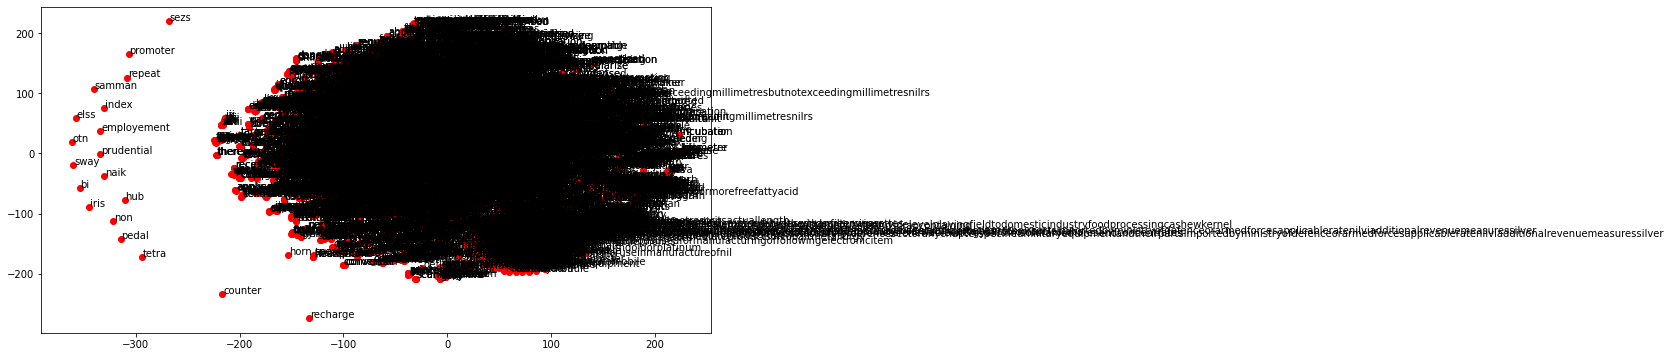

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# Looking at term semantic similarity

In [0]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=unique_words, columns=unique_words)
similarity_df

,toynbee,japans,list,single,streamlined,sal,transit,piyush,castleton,compact,cleanse,development,promotion,student,center,darkness,mutually,bifr,conductor,versus,specialised,solidarity,heater,edge,trailer,svep,reit,obligate,weighted,except,known,diesel,upward,forecast,differentiate,unutilized,insist,sharing,isoprene,seamlessly,...,comprehensible,lte,address,travel,manageable,hour,throe,edible,supplier,innovation,warehousing,crr,basin,charkha,developer,populism,linseed,electrify,successful,contract,help,become,economically,institution,highway,delegation,mahatma,license,usher,jetty,specialized,countryman,stagnate,creativity,samriddha,navigational,nds,conscience,advise,prescribe
toynbee,1.000000,0.212436,-0.164620,-0.252911,-0.030091,0.070551,-0.054167,0.267220,0.269514,-0.056405,-0.061955,-0.149558,-0.095388,-0.061855,-0.150784,-0.035813,-0.013208,0.0,0.000936,-0.071433,-0.018113,-0.031666,-0.016828,-0.155580,-0.081413,0.0,0.208600,0.050127,0.038280,-0.191859,-0.232939,-0.029088,-0.024451,-0.143453,0.006040,0.045031,-0.017185,-0.205737,0.131084,-0.079429,...,0.096850,0.084638,-0.149889,-0.098036,-0.032579,-0.193423,0.194266,-0.015074,-0.085780,-0.025655,-0.006890,0.291844,-0.027104,0.0,-0.099346,0.106779,0.129641,0.078150,-0.181560,-0.164421,-0.221171,-0.197611,-0.043707,-0.071176,-0.058954,-0.039299,0.298781,-0.196092,0.010383,-0.004846,-0.142615,0.081855,0.162665,-0.019663,0.0,-0.041942,0.114650,-0.017231,-0.109361,-0.078482
japans,0.212436,1.000000,-0.085133,-0.062435,-0.014193,0.070143,-0.017279,0.205564,0.261204,-0.025693,0.027095,-0.021659,-0.056999,-0.027308,0.000070,0.015169,0.039527,0.0,-0.135092,-0.028208,0.022498,0.054767,-0.000348,-0.051746,0.000054,0.0,0.250351,0.134575,0.028934,-0.073614,-0.106509,0.118775,0.014776,0.087488,0.001751,0.158813,-0.016027,-0.053025,0.138367,-0.119307,...,0.034255,0.174066,-0.075249,0.000286,-0.018291,-0.131767,0.184179,0.074230,-0.001474,0.044460,0.128368,0.300615,0.027330,0.0,-0.146403,0.130758,0.145091,0.150053,-0.092315,-0.150752,-0.070419,-0.059803,0.116185,0.017981,-0.015727,-0.010462,0.294574,-0.120997,0.119438,0.078300,-0.016152,0.095996,0.184106,0.003637,0.0,0.075066,0.207846,0.015177,-0.076167,0.011297
list,-0.164620,-0.085133,1.000000,0.320478,0.066494,0.016350,0.128216,-0.156984,-0.131773,0.138288,0.141028,0.196329,0.280038,0.241069,0.216854,0.009636,0.128781,0.0,-0.014493,0.069293,0.161101,0.015518,0.090158,0.116242,0.137828,0.0,0.010597,-0.036981,0.116178,0.324953,0.286217,0.076740,0.062803,0.151721,0.164835,-0.084666,0.170398,0.258348,-0.180585,0.062049,...,0.054594,-0.045407,0.459862,0.306136,0.185097,0.188663,-0.187733,0.138675,0.236602,0.122446,0.075790,-0.191659,0.054467,0.0,0.177935,-0.076455,-0.045319,-0.161899,0.291744,0.231903,0.362967,0.302426,0.104153,0.216711,0.112942,0.171019,-0.060478,0.223904,0.046706,-0.027717,0.249723,-0.045794,-0.012791,0.122294,0.0,0.185389,0.002009,0.081757,0.305514,0.132412
single,-0.252911,-0.062435,0.320478,1.000000,0.213958,-0.072845,0.188995,-0.209568,-0.113081,0.371521,0.067150,0.255000,0.226868,0.233685,0.303750,0.152201,0.260758,0.0,0.162330,0.202489,0.186694,0.095393,0.244661,0.303637,0.256137,0.0,-0.061625,0.038829,0.198083,0.334231,0.297196,0.184437,0.209902,0.108028,0.217901,-0.013513,0.192271,0.290781,-0.050372,0.202837,...,0.058563,-0.089921,0.267803,0.221875,0.211617,0.282068,-0.084520,0.110216,0.183430,0.130296,0.148816,-0.248383,0.171397,0.0,0.221064,-0.052163,0.019371,0.016655,0.369619,0.230651,0.226850,0.322857,0.231006,0.238140,0.166279,0.098899,-0.109863,0.242865,0.176630,0.074343,0.241698,0.000834,-0.002162,0.088624,0.0,0.084543,-0.042194,0.128574,0.170793,0.108276
streamlined,-0.030091,-0.014193,0.066494,0.213958,0.999999,-0.123497,0.235284,-0.065264,-0.028425,0.450344,0.070498,0.283454,0.165000,0.107884,0.155975,0.015754,0.162479,0.0,0.041067,0.085808,0.282934,0.039352,0.108902,0.211923,0.093288,0.0,-0.066665,0.080112,0.207060,0.079729,0.084473,0.159843,0.214494,0.027084,0.243847,-0.024755,0.142152,0.186403,-0.04

In [0]:
feature_names = np.array(unique_words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

toynbee                         [iay, upanishad, newar]
japans                        [japan, indias, countrys]
list                            [listing, listed, page]
single                            [one, double, second]
streamlined     [streamline, simplified, sophisticated]
                                 ...                   
navigational            [navigation, compass, navigate]
nds                                     [ita, cso, gta]
conscience                      [moral, faith, dignity]
advise                        [advice, inform, consult]
prescribe              [prescribed, administer, doctor]
Length: 7959, dtype: object

# The FastText Model

The FastText model was first introduced by Facebook in 2016 as an extension and supposedly improvement of the vanilla Word2Vec model. FastText is a framework for learning word representations and also performing robust, fast and accurate text classification. The framework is open-sourced by Facebook on GitHub and claims to have the following.

Recent state-of-the-art English word vectors.
Word vectors for 157 languages trained on Wikipedia and Crawl.
Models for language identification and various supervised tasks.
In general, predictive models like the Word2Vec model typically considers each word as a distinct entity (e.g. where) and generates a dense embedding for the word. However this poses to be a serious limitation with languages having massive vocabularies and many rare words which may not occur a lot in different corpora.

The Word2Vec model typically ignores the morphological structure of each word and considers a word as a single entity. The FastText model considers each word as a Bag of Character n-grams. This is also called as a subword model in the paper.

We add special boundary symbols < and > at the beginning and end of words. This enables us to distinguish prefixes and suffixes from other character sequences. We also include the word w itself in the set of its n-grams, to learn a representation for each word (in addition to its character n-grams).

Taking the word where and n=3 (tri-grams) as an example, it will be represented by the character n-grams: <wh, whe, her, ere, re> and the special sequence < where > representing the whole word. Note that the sequence , corresponding to the word < her > is different from the tri-gram her from the word where.

In practice, the paper recommends in extracting all the n-grams for n ≥ 3 and n ≤ 6. This is a very simple approach, and different sets of n-grams could be considered, for example taking all prefixes and suffixes. We typically associate a vector representation (embedding) to each n-gram for a word.

Thus, we can represent a word by the sum of the vector representations of its n-grams or the average of the embedding of these n-grams. Thus, due to this effect of leveraging n-grams from individual words based on their characters, there is a higher chance for rare words to get a good representation since their character based n-grams should occur across other words of the corpus.



In [0]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, iter=5000)
ft_model

In [0]:
# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index2word
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [0]:
ft_model.wv['scholarship'], ft_model.wv['scholarship'].shape

In [0]:
print(ft_model.wv.similarity(w1='excise', w2='farmer'))
print(ft_model.wv.similarity(w1='taxpayer', w2='electricity'))

NameError: ignored

In [0]:
st1 = "excise tax electricity"
print('Odd one out for [',st1, ']:',  
      ft_model.wv.doesnt_match(st1.split()))

st2 = "farmer industry yojana development"
print('Odd one out for [',st2, ']:', 
      ft_model.wv.doesnt_match(st2.split()))